In [27]:
import os
import numpy as np
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn import metrics
from scipy.ndimage import convolve

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt


In [28]:
n_categories = 10
n_variables = 121  # Number of variables in the dataset
mcm_filename_format = "train-images-unlabeled-{}_comms.dat"
data_filename_format = "train-images-unlabeled-{}.dat"
data_path = "../INPUT/data/"
communities_path = "../INPUT/MCMs/"
output_path = "../OUTPUT/"
data_size = 5423

# for k in range(n_categories):
X_train = np.empty((data_size*n_categories,n_variables))
for k in range(n_categories):
    im_path = os.path.join(data_path,data_filename_format.format(k))
    X_train[k*data_size:(k+1)*data_size, :] = np.genfromtxt(im_path,delimiter=1,dtype=int)
Y_train = np.repeat(np.arange(10),data_size)


In [29]:
# shape is (sample, image_size)
X_test = np.genfromtxt(os.path.join(data_path, "test-images-unlabeled-all-uniform.txt"),delimiter=1, dtype=int)
Y_test = np.loadtxt(os.path.join(data_path, "test-labels-uniform.txt"))


RBM + KNN

In [30]:
knn = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree')
 
rbm = BernoulliRBM(n_components=625, learning_rate=0.00001, n_iter=10, verbose=False, random_state=42)
 
rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("KNN", knn)])
# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)

Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=1e-05, n_components=625,
                              random_state=42, verbose=False)),
                ('KNN',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7))])

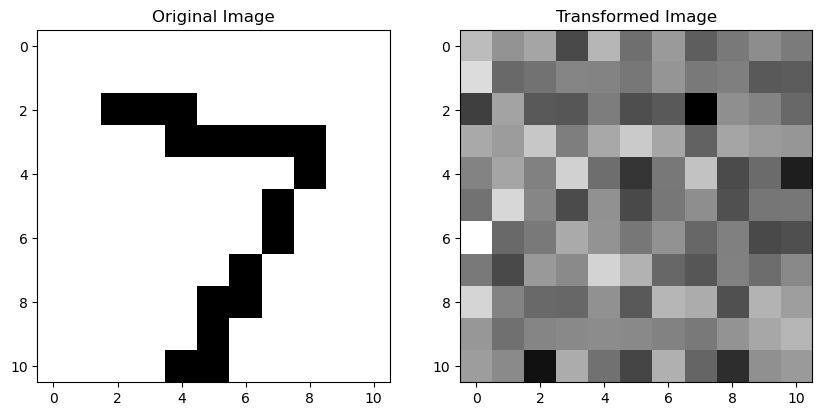

In [31]:
# Access the trained RBM model from the pipeline
rbm_model = rbm_features_classifier.named_steps['rbm']

# Transform the data using the trained RBM's transform method
X_transformed = rbm_model.transform(X_test)
reduced_features = X_transformed[:, :121]  # Select the first 64 features

sid_l = 11
# Reshape X_transformed for plotting
X_transformed_reshaped = reduced_features.reshape(-1, sid_l, sid_l)

# Visualize the original and transformed data
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X_test[0].reshape(sid_l, sid_l), cmap=plt.cm.gray_r, interpolation='nearest')
axes[0].set_title('Original Image')
axes[1].imshow(X_transformed_reshaped[0], cmap=plt.cm.gray_r, interpolation='nearest')
axes[1].set_title('Transformed Image')
plt.show()


KNN using RBM features:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       0.94      1.00      0.97        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.93      0.95        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



ValueError: cannot reshape array of size 625 into shape (8,8)

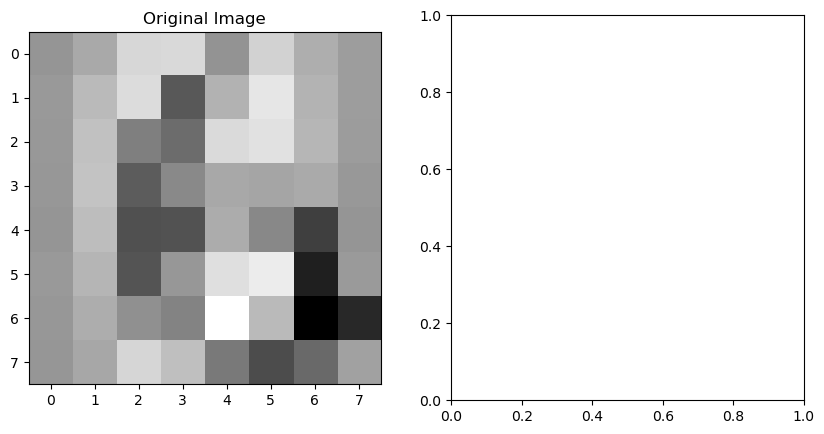

In [14]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load a dataset (for this example, we'll use the digits dataset)
digits = load_digits()
X = digits.data
y = digits.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the RBM and KNN models
rbm = BernoulliRBM(n_components=625, learning_rate=0.00001, n_iter=10, verbose=False, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree')

# Create the RBM-KNN pipeline
rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("knn", knn)])

# Train the pipeline
rbm_features_classifier.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred = rbm_features_classifier.predict(X_test)
print("KNN using RBM features:\n", classification_report(y_test, y_pred))

# Perform RBM transformation (assuming this is the intended step)



In [24]:
# Access the trained RBM model from the pipeline
rbm_model = rbm_features_classifier.named_steps['rbm']

# Transform the data using the trained RBM's transform method
X_transformed = rbm_model.transform(X_test)
reduced_features = X_transformed[:, :64]  # Select the first 64 features

sid_l = 11
# Reshape X_transformed for plotting
X_transformed_reshaped = reduced_features.reshape(-1, sid_l, sid_l)

# Visualize the original and transformed data
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X_test[0].reshape(sid_l, sid_l), cmap=plt.cm.gray_r, interpolation='nearest')
axes[0].set_title('Original Image')
axes[1].imshow(X_transformed_reshaped[0], cmap=plt.cm.gray_r, interpolation='nearest')
axes[1].set_title('Transformed Image')
plt.show()


ValueError: cannot reshape array of size 23040 into shape (11,11)

In [5]:

Y_pred = rbm_features_classifier.predict(X_test)
print(
    "Logistic regression using RBM features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)

Old stuff 
---------------------


In [6]:
# rbm.learning_rate = 0.06
# rbm.n_iter = 10

# # model complexity. 
# rbm.n_components = 100
# logistic.C = 6000 # inverse regularisation

# rbm_features_classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -39.23, time = 4.97s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -36.18, time = 2.76s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -33.82, time = 5.72s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -32.43, time = 3.91s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -32.75, time = 2.92s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -32.02, time = 5.51s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -31.27, time = 2.77s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -30.97, time = 2.76s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -31.36, time = 2.44s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -31.04, time = 2.39s


Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.06, n_components=100,
                              random_state=0, verbose=True)),
                ('logistic',
                 LogisticRegression(C=6000, solver='newton-cg', tol=1))])

In [7]:

# Y_pred = rbm_features_classifier.predict(X_test)
# print(
#     "Logistic regression using RBM features:\n%s\n"
#     % (metrics.classification_report(Y_test, Y_pred))
# )

Logistic regression using RBM features:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       892
         1.0       0.98      0.98      0.98       892
         2.0       0.93      0.93      0.93       892
         3.0       0.90      0.91      0.90       892
         4.0       0.91      0.88      0.90       892
         5.0       0.91      0.90      0.91       892
         6.0       0.96      0.96      0.96       892
         7.0       0.94      0.91      0.92       892
         8.0       0.89      0.90      0.90       892
         9.0       0.86      0.88      0.87       892

    accuracy                           0.92      8920
   macro avg       0.92      0.92      0.92      8920
weighted avg       0.92      0.92      0.92      8920




Logistic Model only

In [8]:
# # only logistic model
# logistic_clf = clone(logistic)
# logistic_clf.C = 100.0
# logistic_clf.fit(X_train, Y_train)

# Y_pred = logistic_clf.predict(X_test)
# print(
#     "Logistic regression using raw pixel features:\n%s\n"
#     % (metrics.classification_report(Y_test, Y_pred))
# )

Logistic regression using raw pixel features:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       892
         1.0       0.94      0.97      0.96       892
         2.0       0.90      0.88      0.89       892
         3.0       0.88      0.88      0.88       892
         4.0       0.88      0.90      0.89       892
         5.0       0.88      0.86      0.87       892
         6.0       0.92      0.94      0.93       892
         7.0       0.89      0.89      0.89       892
         8.0       0.87      0.85      0.86       892
         9.0       0.86      0.85      0.86       892

    accuracy                           0.90      8920
   macro avg       0.90      0.90      0.90      8920
weighted avg       0.90      0.90      0.90      8920




In [9]:
# def nudge_dataset(X, Y):
#     """
#     This produces a dataset 5 times bigger than the original one,
#     by moving the 8x8 images in X around by 1px to left, right, down, up
#     """
#     direction_vectors = [
#         [[0, 1, 0], [0, 0, 0], [0, 0, 0]],
#         [[0, 0, 0], [1, 0, 0], [0, 0, 0]],
#         [[0, 0, 0], [0, 0, 1], [0, 0, 0]],
#         [[0, 0, 0], [0, 0, 0], [0, 1, 0]],
#     ]

#     def shift(x, w):
#         return convolve(x.reshape((8, 8)), mode="constant", weights=w).ravel()

#     X = np.concatenate(
#         [X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors]
#     )
#     Y = np.concatenate([Y for _ in range(5)], axis=0)
#     return X, Y
